In [61]:

# !pip uninstall -y black-vietocr
# !pip install -r requirements.txt
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 5.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 5.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 kB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [30]:
# pip uninstall -y torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric

In [31]:
# !pip install torch-geometric torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.13.0+${CUDA}.html

In [6]:
import os
import cv2
import json
from ocr import *


In [7]:
def get_model_vietocr():
    config = Cfg.load_config_from_file('./checkpoint/vietocr/vgg-seq2seq.yml')
    # config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
    config['weights'] = './checkpoint/vietocr/vgg_seq2seq.pth'
    config['cnn']['pretrained'] = False
    if torch.cuda.is_available():
        config['device'] = 'cuda:0'
    else:
        config['device'] = 'cpu'

    config['predictor']['beamsearch'] = False
    model = Predictor(config)
    return model
model=get_model_vietocr()

In [3]:
list_configs()

['inception_v3_seq2seq',
 'inception_v3_seq2seq_large',
 'mobilenet_v3l_seq2seq',
 'resnet50_seq2seq',
 'vgg_transformer',
 'vgg_seq2seq']

In [8]:
torch.cuda.is_available()

True

## All data

### Hóa đơn giá trị gia tăng gốc

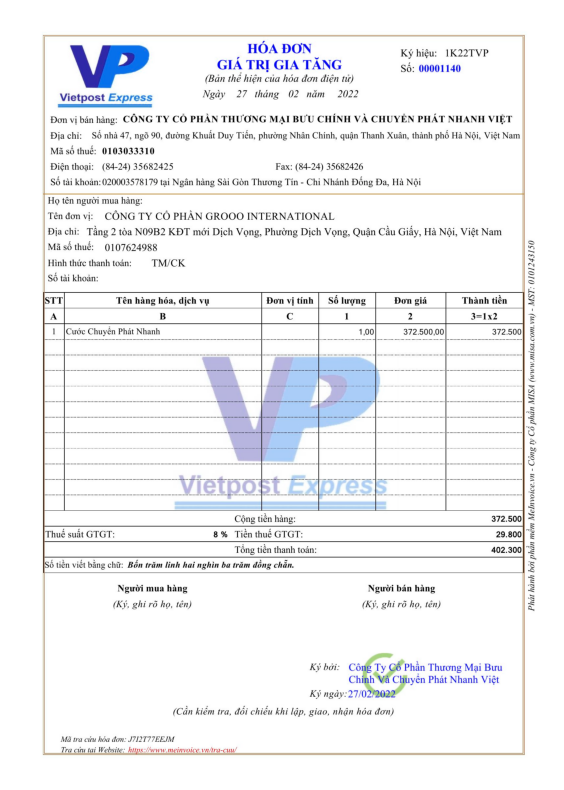

In [2]:
folder_path = './data/image/original_image/'

for filename in os.listdir(folder_path):
#     if "png" not in filename:
#         continue
    image_path=os.path.join(folder_path,filename)
    img=cv2.imread(image_path)
    plot_img(img,(10,10))
    
    break

### Hóa đơn sinh từ doc

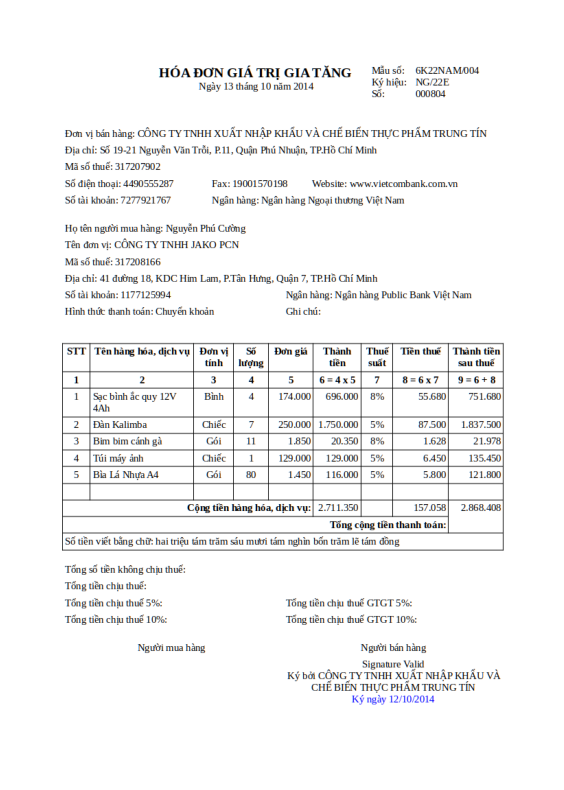

In [3]:
folder_path = './data/image/invoice_gen_image_v1/'

for filename in os.listdir(folder_path):
#     if "png" not in filename:
#         continue
    image_path=os.path.join(folder_path,filename)
    img=cv2.imread(image_path)
    plot_img(img,(10,10))
    
    break

### Hóa đơn sinh từ ảnh bôi trắng

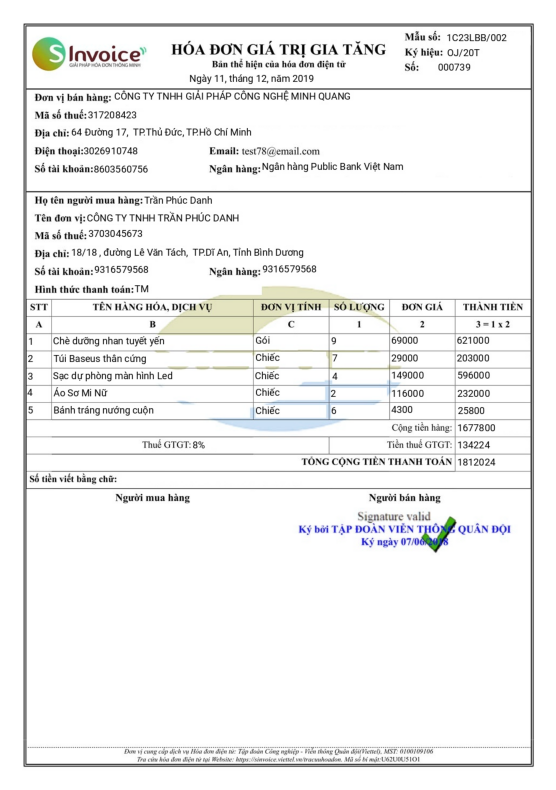

In [4]:
folder_path = './data/image/white_box_invoice/'

for filename in os.listdir(folder_path):
#     if "png" not in filename:
#         continue
    image_path=os.path.join(folder_path,filename)
    img=cv2.imread(image_path)
    plot_img(img,(10,10))
    
    break

## All Model

### Detection

#### Craft

In [32]:
# import Craft class
from craft_text_detector import Craft

image_folder= './data/image/invoice_gen_image_v1/'
for filename in os.listdir(image_folder):
    print("Detecting :",filename)
    full_path=os.path.join(image_folder,filename)
    # set image path and export folder directory
    image = full_path # can be filepath, PIL image or numpy array
    output_dir = './data/craft/'

    # create a craft instance
    craft = Craft(output_dir=output_dir, crop_type="poly", cuda=False)

    # apply craft text detection and export detected regions to output directory
    prediction_result = craft.detect_text(image)

    # unload models from ram/gpu
    craft.unload_craftnet_model()
    craft.unload_refinenet_model()
    break

Detecting : 000000000-template_01.png


/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and may be removed in the future. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Craft text detector weight will be downloaded to /home/dev/.craft_text_detector/weights/craft_mlt_25k.pth


Downloading...
From: https://drive.google.com/uc?id=1bupFXqT-VU6Jjeul13XP7yx2Sg5IHr4J
To: /home/dev/.craft_text_detector/weights/craft_mlt_25k.pth

  0%|                                                                                                                                                                                  | 0.00/83.2M [00:00<?, ?B/s]
  1%|█                                                                                                                                                                         | 524k/83.2M [00:00<00:29, 2.80MB/s]
  2%|███▏                                                                                                                                                                     | 1.57M/83.2M [00:00<00:16, 4.87MB/s]
  3%|█████▎                                                                                                                                                                   | 2.62M/83.2M [00:00<00:15, 5.31MB/s]
  4%

 40%|███████████████████████████████████████████████████████████████████▏                                                                                                     | 33.0M/83.2M [00:06<00:08, 5.90MB/s]
 41%|█████████████████████████████████████████████████████████████████████▎                                                                                                   | 34.1M/83.2M [00:07<00:08, 5.88MB/s]
 42%|███████████████████████████████████████████████████████████████████████▍                                                                                                 | 35.1M/83.2M [00:07<00:07, 6.01MB/s]
 44%|█████████████████████████████████████████████████████████████████████████▌                                                                                               | 36.2M/83.2M [00:07<00:10, 4.62MB/s]
 44%|██████████████████████████████████████████████████████████████████████████▌                                                                        

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 57.7M/83.2M [00:12<00:08, 3.09MB/s]
 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 58.2M/83.2M [00:13<00:07, 3.35MB/s]
 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 59.2M/83.2M [00:13<00:05, 4.18MB/s]
 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 60.3M/83.2M [00:13<00:05, 4.52MB/s]
 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       

Craft text refiner weight will be downloaded to /home/dev/.craft_text_detector/weights/craft_refiner_CTW1500.pth


Downloading...
From: https://drive.google.com/uc?id=1xcE9qpJXp4ofINwXWVhhQIh9S8Z7cuGj
To: /home/dev/.craft_text_detector/weights/craft_refiner_CTW1500.pth

  0%|                                                                                                                                                                                  | 0.00/1.85M [00:00<?, ?B/s]
 28%|████████████████████████████████████████████████                                                                                                                          | 524k/1.85M [00:00<00:00, 1.72MB/s]
 57%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 1.05M/1.85M [00:00<00:00, 1.60MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.85M/1.85M [00:01<00:00, 1.80MB

#### Doctr

In [16]:
detection_model=get_model_doctr()
data_all=[]
MAX_IMAGE=0
image_folder= './data/image/invoice_gen_image_v1/'
for filename in os.listdir(image_folder):
    print("Detecting :",filename)
    full_path=os.path.join(image_folder,filename)
    bboxes, image, h, w = detection_doctr(full_path, detection_model)

    img=cv2.imread(full_path)
    # out_path=os.path.join(output_folder,filename)
    # cv2.imwrite(out_path,img)

    detect_result={
        "id":filename,
        "image":image,
        "bboxes":bboxes, #x1,y1,x2,y2
        "height":h,
        "width":w,
    }
    data_all.append(detect_result)

    if MAX_IMAGE == 0:
        break
    MAX_IMAGE-=1


Detecting : 000000000-template_01.png


### Recognition

#### GG-API

#### VietOCR

In [17]:
import time
recognition_model=get_model_vietocr(config_name="./checkpoint/vietocr/vgg-seq2seq.yml")

000000000-template_01.png


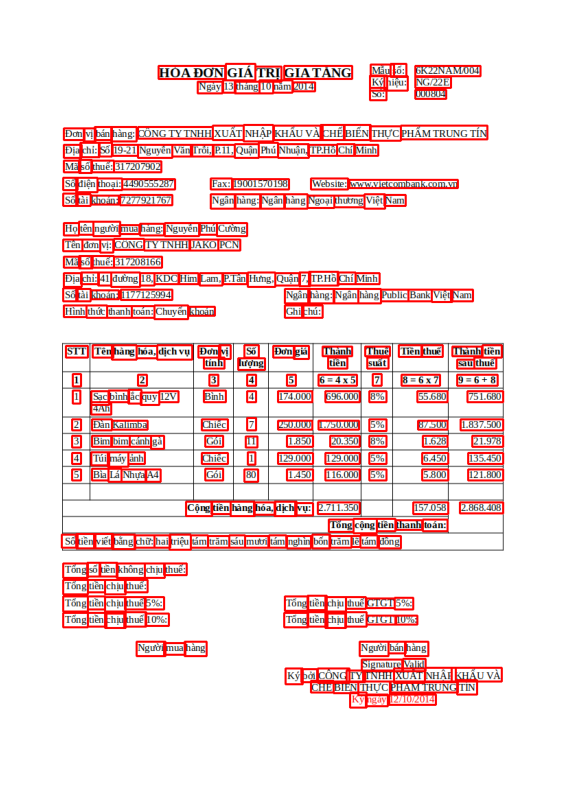

 HÓA ĐƠN GIÁ TRỊ GIATĂNG Mẫu s số: 6K22NAM/004
 Ngày 13 tháng 10 năm 2014 Ký hiệu: NG/22E
 Số: 000804
 Đơn vị bán hàng: CÔNG TY TNHH XUẤT NHẬP KHẨU VÀ CHẾ BIẾN THỰC PHẨM TRUNG TÍN
 Địa chỉ: SỐ 19-21 Nguyễn Văn Trỗi, P.11, Quận Phú Nhuận, TP.Hồ Chí Minh
 Mã số thuế: 317207902
 SỐ điện thoại: 4490555287 Fax: 19001570198 Website: www.vietcombank.com.vn
 SỐ tài khoản: 7277921767 Ngân hàng: Ngân hàng Ngoại thương Việt Nam
 Họ tên người mua hàng: Nguyễn Phú Cường
 Tên đơn vị: CÔNG TY TNHH JAKO PCN
 Mã SỐ thuế: 317208166
 Địa chỉ: 41 đường 18 KDC Him Lam, P.Tân Hưng Quận 7 TP.Hồ Chí Minh
 SỐ tài khoản: 1177125994 Ngân hàng: Ngân hàng Public Bank Việt Nam
 Hình thức thanh toán: Chuyển khoản Ghi chú:
 STT Tên hàng hóa, dịch vụ Đơn vị SỐ Đơn giá Thành Thuế Tiền thuế Thành tiền
 tính lượng tiền suất sau thuế
 L 2 3 4 5 6:4x5 z 8:6x7 9:6+8
 L Sạc bình ắc quy 12V Bình 4 174.000 696.000 8% 55.680 751.680
 4Ah
 2 Đàn Kalimba Chiếc z 250.000 1.750.000 5% 87.500 1.837.500
 3 Bim bim cánh gà Gói 11 1.85

In [18]:
# def recognition_vietocr(image, bboxes, model):
#     raw_text = []
#     # image = np.frombuffer(image, np.uint8)
#     # image = cv2.imdecode(image, cv2.IMREAD_COLOR)
#     for box in bboxes:
#         # print("image.shape: ",image.shape)
#         # print("box: ",box)
#         img_box = image[box[1]:box[3], box[0]:box[2]]
#         # print("img_box.shape: ",img_box.shape)
#         img_box = Image.fromarray(img_box)
#         text = model.predict(img_box)
#         if text == []:
#             raw_text.append("?")
#             continue
#         raw_text.append(str(text))
#     return raw_text

recognition_time=0
for data in data_all:
    bboxes=data['bboxes']
    img=data['image']
    a=time.time()
    raw_text = recognition_vietocr(img, bboxes, recognition_model)
    b=time.time()
    recognition_time+=(b-a)

    g = arrange_bbox(bboxes)
    rows = arrange_row(g=g)
    # rows = split_row(rows, bboxes, w, ratio=0.2)

    print("=="*30)
    print(data['id'])
    
    for bbox in bboxes:
         img=cv2.rectangle(img, (bbox[0],bbox[1]), (bbox[2],bbox[3]),(255,0,0) , 2)
    
    
    plot_img(img,(10,10))

    for row in rows:
        x=""
        for i in row:
            x=x+" "+raw_text[i]
        print(x)
    
    break

print(f"Tổng thời gian đọc ảnh: {recognition_time}")

#### Tesseract

### Information Extraction

In [9]:
from tablenet.table import *

detect_model = get_model_doctr()
recognize_model = get_model_vietocr()
tablenet_model= get_tablenet_model("./tablenet_checkpoint/invoice_tablenet_05_09.pth.tar")


/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to pass

In [10]:
def ocr_part(image_path,detect_model,recognize_model,tablenet_model,need_table=True):

    bboxes, image, h, w = detection_doctr(image_path, detect_model)

    raw_text = recognition_vietocr(image, bboxes, recognize_model)

    g = arrange_bbox(bboxes)
    rows = arrange_row(g=g)
    rows = split_row(rows, bboxes, w, ratio=0.2)

    new_text = []
    new_box = []
    box_to_merge = []
    text_to_merge = []
    for i in range(len(rows)):
        box_row = []
        text_row = []
        for j in rows[i]:
            new_text.append(raw_text[j])
            new_box.append(bboxes[j])
            text_row.append(raw_text[j])
            box_row.append(bboxes[j])
        box_to_merge.append(box_row)
        text_to_merge.append(text_row)

    mapping, merged_boxes, merged_texts = get_mapping(
        box_to_merge, text_to_merge)

    if need_table:
        table_part= table_extraction(image, h, w,tablenet_model)
        table_part = cv2.cvtColor(table_part, cv2.COLOR_BGR2GRAY) 
        column_coords_list=get_column_coords(table_part)
        ocr_result=dict(
                    texts=new_text,
                    bboxes=[convert_xyxy_poly(b) for b in new_box],
                    height=h,
                    width=w,
                    mapping=mapping,
                    merged_boxes=[convert_xyxy_poly(b) for b in merged_boxes],
                    merged_texts=merged_texts,
                    column_coords=column_coords_list
                )
    else:
        ocr_result=dict(
                    texts=new_text,
                    bboxes=[convert_xyxy_poly(b) for b in new_box],
                    height=h,
                    width=w,
                    mapping=mapping,
                    merged_boxes=[convert_xyxy_poly(b) for b in merged_boxes],
                    merged_texts=merged_texts,
                )
    return ocr_result

In [13]:
# from spade import model_gnn_2_copy as spade
from spade import model_gnn_2 as spade

device = "cuda" if torch.cuda.is_available() else "cpu"

fields = [
    "info.date",
    "info.form",
    "info.serial",
    "info.num",
    "info.sign_date",
    "seller.name",
    "seller.company",
    "seller.tax",
    "seller.tel",
    "seller.address",
    "seller.bank",
    "customer.name",
    "customer.company",
    "customer.tax",
    "customer.tel",
    "customer.address",
    "customer.bank",
    "customer.payment_method",
    "menu.product_id",
    "menu.description",
    "menu.unit",
    "menu.quantity",
    "menu.unit_price",
    "menu.subtotal",
    "menu.vat_rate",
    "menu.vat",
    "menu.total",
    "total.subtotal",
    "total.vat_rate",
    "total.vat",
    "total.total",
]


config = spade.GSpadeConfig(n_layers=5,
                            d_gb_hidden=60,
                            d_edge=60,
                            d_hidden=1280,
                            d_head=768,
                            n_attn_head=1,
                            n_labels=len(fields))

ie_model = spade.GSpadeForIE(config)
ie_model = ie_model.float()
ie_model = ie_model.to(device)

# weight_path = "./checkpoint/0483/best_score_fuzz.pt" #IIE weight
# weight_path = "./checkpoint/0494/best_parsed_f1.pt" #Train với dữ liệu gốc
# weight_path = "./checkpoint/0493/best_parsed_f1.pt" #Train với dữ liệu tự sinh
weight_path = "./checkpoint/gcn/0009/best_parsed_f1.pt" #Train với dữ liệu tự sinh + gốc

pretrain = torch.load(weight_path, map_location=device)
result = ie_model.load_state_dict(pretrain)
print("load weight result", result)

load weight result <All keys matched successfully>


In [38]:
from spade.model_postprocessors import (
    get_parsed_labeling,
    get_parsed,
    get_parsed_grouping,
    get_parsed_grouping_v2,
    format_parsed_prettyly,
    remove_stopwords,
    remove_stopwords_2,
)
from tqdm import tqdm
import random
from spade import model_gnn_2 as spade
from pprint import pprint
from spade.model_rulebase import rule_base_extract
from typing import Optional

def get_num_from_string(text):
    num=""
    for i in range(len(text)):
        if text[i].isdigit():
            num+=text[i]
    if num == "":
        return num
    return int(num)

def get_payment(fields, bboxes, texts):
    
    # if len(menu)==0:
    #     return 0
    
    # #Tính tổng các sản phẩm trong menu
    # total_from_menu=[]
    # for product in menu:
    #     if "total" in product:
    #         total_from_menu.append(get_num_from_string(product["total"]))
    # if total_from_menu==[]:
    #     total_from_menu=[0]
    #Xét các "hàng" chứa nhãn
    total_from_label=[]
    total_labels=["Tổng cộng tiền thanh toán","Total payment","Tiền thanh toán","Tổng tiền thanh toán","Tổng cộng"]
    label_box_id=[]
    label_box_center=[]
    for i in range(len(texts)):
        for total_label in total_labels:
            if fuzz.partial_ratio(total_label,texts[i])>95:
                label_box_id.append(i)
    #Tìm các box cùng hàng "total_labels"
    for i in range(len(texts)):
        for box_id in label_box_id:
            center_height=(bboxes[box_id][0][1]+bboxes[box_id][2][1])/2
            if bboxes[i][0][1]<center_height and bboxes[i][2][1]>center_height:
                if get_num_from_string(texts[i])=="":
                    continue
                total_from_label.append(get_num_from_string(texts[i]))
    
    if total_from_label==[]:
        return 0
    return max(total_from_label)

def get_extraction_result(fields, bboxes,texts, rel_s,column_coords_list = None,gt=False):
    # rel_s = output.relations[0].cpu().tolist()
    # print(len(rel_s[0]))
    # bboxes = ocr_output['merged_boxes']
    # texts = ocr_output['merged_texts']
    invoice_fields = fields
    

    # def post_process(self, texts, relations, fields, **kwargs):
    # ie_output = app.invoice_extraction_model.post_process(
    #     texts=ocr_result['texts']
    # )
    rule_base_result =\
        rule_base_extract(texts,
                          bboxes)

    
    labeling, bigbox_mapping = get_parsed_labeling(invoice_fields, rel_s)
    grouping = get_parsed_grouping(
        invoice_fields,
        bboxes,
        labeling,
        bigbox_mapping,
    )
    parsed = get_parsed(
        invoice_fields,
        texts,
        labeling,
        grouping,
        bigbox_mapping,
    )
    if gt == True:
        return parsed

#     print("parsed before: ")
#     pprint(parsed)

    payment_rule_based=get_payment(fields, bboxes, texts)
    
    menu_rule_based=[]
    if column_coords_list is not None:
        menu_rule_based=menu_extraction_v3(fields, bboxes,texts, rel_s,column_coords_list)
        print(("-----------------"))
        print("Menu: ")
        pprint(menu_rule_based)

#     Use rule base to fill missing information
    print("Use rule base to fill missing information: ")
    pprint(rule_base_result)
    print("--"*30)
    print(parsed)


    for k, v in rule_base_result.items():
        group, field = k.split('.')

        if group not in parsed:
            parsed[group] = dict()
        if parsed[group].get(k, None) is None:
            parsed[group][k] = v

    # print("parsed second: ")
    # pprint(parsed)

    
    # parsed = apply_recursively(parsed, str, remove_stopwords)
    parsed = remove_stopwords_2(parsed)
    parsed = format_parsed_prettyly(parsed)
#     print("parsed[menu]: ",parsed["menu"])
#     print("menu_rule_based: ",menu_rule_based)
    
#     if len(parsed["menu"])<len(menu_rule_based):
#         parsed["menu"]=menu_rule_based
    parsed["menu"]=menu_rule_based
    
    
    return parsed


def ie_part(ocr_result,model,need_table=False):
        
    ie_input=spade.parse_input(texts=ocr_result['merged_texts'],
                                bboxes=ocr_result['merged_boxes'],
                                width=ocr_result['width'],
                                height=ocr_result['height'])

    batch = ie_input['batch'].to(device)
    with torch.no_grad():
        ie_output = model(batch)
    
    if need_table:
        parsed=get_extraction_result(fields,ocr_result['merged_boxes'], ocr_result['merged_texts'],ie_output.relations[0].cpu().tolist(), column_coords_list=ocr_result['column_coords'])
    else:
        parsed=get_extraction_result(fields,ocr_result['merged_boxes'], ocr_result['merged_texts'],ie_output.relations[0].cpu().tolist())

    return parsed, ie_output.relations[0].cpu().tolist(), ie_output.relations[1].cpu().tolist()

In [15]:
def get_max_area(table_boundRect):
    max_area=0
    max_coord=[0,0,0,0]
    for x,y,w,h in table_boundRect:
        if w*h>max_area:
            max_area=w*h
            max_coord=[x,y,w,h]
    return max_coord[0],max_coord[1],max_coord[2],max_coord[3]
    

def predict(img_path,model):
    
    orig_image = Image.open(img_path)
    or_w,or_h=orig_image.size
    resize_img=orig_image.resize((1024, 1024))
    test_img = np.array(resize_img.convert('LA').convert("RGB"))
    
    image = TRANSFORM(image = test_img)["image"]
    with torch.no_grad():
        image = image.unsqueeze(0)
        #with torch.cuda.amp.autocast():
        table_out= model(image)
        table_out = torch.sigmoid(table_out)

    #remove gradients
    table_out = (table_out.detach().numpy().squeeze(0).transpose(1,2,0) > 0.5).astype(np.uint8)

    #get contours of the mask to get number of tables
    contours, table_heirarchy = cv2.findContours(table_out, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    table_contours = []
    #ref: https://www.pyimagesearch.com/2015/02/09/removing-contours-image-using-python-opencv/
    #remove bad contours
    for c in contours:

        if cv2.contourArea(c) > 3000:
            table_contours.append(c)

    if len(table_contours) == 0:
        print("No Table detected")

    table_boundRect = [None]*len(table_contours)
    for i, c in enumerate(table_contours):
        polygon = cv2.approxPolyDP(c, 3, True)
        table_boundRect[i] = cv2.boundingRect(polygon)

    #table bounding Box
    table_boundRect.sort()

    x,y,w,h=get_max_area(table_boundRect)
    # for x,y,w,h in table_boundRect:
    new_x=int(x*or_w/1024)
    new_y=int(y*or_h/1024)
    new_w=int(w*or_w/1024)
    new_h=int(h*or_h/1024)  
    
    # return new_x,new_y,new_w,new_h
    orig_image=cv2.imread(img_path)
    table_image = 255*np.ones_like(orig_image)
    table_part=orig_image[new_y:new_y+new_h,new_x:new_x+new_w]
    table_image[new_y:new_y+new_h,new_x:new_x+new_w]=table_part

    return table_image, new_x,new_y,new_w,new_h

#Show img
def plot_img(img,size):
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#Vẽ bounding box
def bounding_box(x1,y1,x2,y2,img):
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
    return img

# img_path="/home/phung/phung/Anh_Hung/OCR/OCR-invoice/Vietnamese/Invoice_template/Hoa_don_dich_vu/Thang 03.2022 jpg/Chuyen phat nhanh_page_1.jpg"
# x,y,w,h=predict(img_path,tablenet_model)
# img=cv2.imread(img_path)
# img=bounding_box(x,y,x+w,y+h,img)
# plot_img(img,(15,15))

In [25]:
from thefuzz import fuzz
import math
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

#Show img
def plot_img(img,size):
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
#Version 1
def menu_extraction(fields, bboxes,texts, rel_s):

    #Tìm giới hạn trên dưới của đầu cột dựa vào box STT
    head_column_upper_bound=0
    head_column_under_bound=0
    # id_min_height=0
    # id_max_height=0
    for i in range(len(texts)):
        if fuzz.partial_ratio("STT",texts[i]) >90:
            head_column_upper_bound=bboxes[i][0][1]
            head_column_under_bound=bboxes[i][2][1]
        
        if head_column_upper_bound !=0 and fuzz.partial_ratio("No",texts[i]) >95:
            if abs(bboxes[i][0][1]-head_column_under_bound)< (head_column_under_bound-head_column_upper_bound):
                head_column_under_bound=bboxes[i][2][1]
        
    if head_column_upper_bound==0:
        print("Không tìm thấy STT")
        return 0
    #Tìm các giới hạn
    column_lr_bound={} #Giới hạn trái phải của cột
    for i in range(len(texts)):
        center_height=(bboxes[i][0][1]+bboxes[i][2][1])/2
        if center_height>=head_column_upper_bound and center_height<=head_column_under_bound:
            if fuzz.partial_ratio("STT",texts[i]) >90:
                column_lr_bound["id"]=[bboxes[i][0][0],bboxes[i][2][0]]
            if fuzz.partial_ratio("Tên hàng hóa",texts[i]) >70 or fuzz.partial_ratio("Nội dung",texts[i]) >70 or fuzz.partial_ratio("Tên thiết bị",texts[i]) >70:
                column_lr_bound["description"]=[bboxes[i][0][0],bboxes[i][2][0]]

            if fuzz.partial_ratio("đơn vị",texts[i]) >70 or fuzz.partial_ratio("ĐVT",texts[i]) >70:
                column_lr_bound["unit"]=[bboxes[i][0][0],bboxes[i][2][0]]

            if fuzz.partial_ratio("Số lượng",texts[i]) >60 or fuzz.partial_ratio("SL",texts[i]) >60:
                column_lr_bound["quantity"]=[bboxes[i][0][0],bboxes[i][2][0]]

            if fuzz.partial_ratio("Đơn giá",texts[i]) >60 or fuzz.partial_ratio("Đơn",texts[i]) >85:
                column_lr_bound["unit_price"]=[bboxes[i][0][0],bboxes[i][2][0]]

            if fuzz.partial_ratio("Amount",texts[i]) >75:
                column_lr_bound["subtotal"]=[bboxes[i][0][0],bboxes[i][2][0]]

            if fuzz.partial_ratio("Thuế suất",texts[i]) >75:
                column_lr_bound["vat_rate"]=[bboxes[i][0][0],bboxes[i][2][0]]
                
            if fuzz.partial_ratio("Tiền Thuế",texts[i])>90 and fuzz.partial_ratio("VAT",texts[i]) >90:
                if "vat_rate" in column_lr_bound and column_lr_bound["vat_rate"][0]==bboxes[i][0][0]:
                    continue
                column_lr_bound["vat"]=[bboxes[i][0][0],bboxes[i][2][0]]

            if fuzz.partial_ratio("Total",texts[i]) >60 or fuzz.partial_ratio("Thành tiền",texts[i]) >60:
                column_lr_bound["total"]=[bboxes[i][0][0],bboxes[i][2][0]]

    # print("column_lr_bound: ",column_lr_bound)
    #Danh sách đầu cột
    head_boxes_in_column={}
    column_keys=[key for key in column_lr_bound.keys()]
    for key in column_keys:
        head_boxes_in_column[key]=[]
    for i in range(len(texts)):
        center_width=(bboxes[i][0][0]+bboxes[i][2][0])/2
        center_height=(bboxes[i][0][1]+bboxes[i][2][1])/2
        for key in column_keys:
                center_line=(center_width+(column_lr_bound[key][0]+column_lr_bound[key][1])/2)/2
                if center_line>=column_lr_bound[key][0] and center_line <=column_lr_bound[key][1] and center_height >head_column_upper_bound and center_height <head_column_under_bound :
                    head_boxes_in_column[key].append(i)

    #Giới hạn trên dưới của cột
    #Tính dựa vào box Total

    column_upper_bound=head_column_under_bound
    column_under_bound=head_column_under_bound
    text_end_column=['Cộng tiền hàng',"Thuế suất", "Tổng cộng", "Không chịu thuế", "CỘNG (TOTAL)"] 
    text_in_total_column=['0','1','2','3','4','5','6','7','8','9','x','=']
    for i in range(len(texts)):
        center_width=(bboxes[i][0][0]+bboxes[i][2][0])/2
        
        center_height=(bboxes[i][0][1]+bboxes[i][2][1])/2
        if any(fuzz.partial_ratio(x,texts[i])>80 for x in text_end_column) and center_height>column_upper_bound:
                column_under_bound = bboxes[i][0][1]
                break
        if "total" in column_lr_bound:
            center_width_line=(center_width+(column_lr_bound["total"][0]+column_lr_bound["total"][1])/2)/2
            if center_width_line>column_lr_bound["total"][0] and center_width_line>column_lr_bound["total"][1] and center_height>column_upper_bound:
                if any(x in texts[i] for x in text_in_total_column) and bboxes[i][2][1] > column_under_bound :
                    column_under_bound = bboxes[i][2][1]
                else:
                    break
    #Danh sách các box nằm trong giới hạn
    menu_boxes={}
    column_keys=[key for key in column_lr_bound.keys()]
    for key in column_keys:
        menu_boxes[key]=[]
    for i in range(len(texts)):
        center_width=(bboxes[i][0][0]+bboxes[i][2][0])/2
        
        center_height=(bboxes[i][0][1]+bboxes[i][2][1])/2
        if center_height>column_upper_bound and center_height <column_under_bound:
            for key in column_keys:
                center_width_line=(center_width+(column_lr_bound[key][0]+column_lr_bound[key][1])/2)/2
                if center_width_line>=column_lr_bound[key][0] and center_width_line<=column_lr_bound[key][1]:
                    menu_boxes[key].append(i)

                    if bboxes[i][0][0]<column_lr_bound[key][0]:
                        column_lr_bound[key][0]=bboxes[i][0][0]
                    if bboxes[i][2][0]>column_lr_bound[key][1]:
                        column_lr_bound[key][1]=bboxes[i][2][0]
    #Lấy thông tin sản phẩm
    
    #Trường hợp không có sản phẩm
    if len(menu_boxes['id'])==0:
        print("Không tìm thấy sản phẩm")
        return 0

    #Lấy thông tin cận trên cận dưới từng sản phẩm dựa vào STT
    up_un_bouding=[]
    id_boxes=menu_boxes['id']
    up_un_bouding.append(head_column_under_bound)
    for i  in range(len(id_boxes)):
        last_height=up_un_bouding[len(up_un_bouding)-1]
        center_height=(bboxes[id_boxes[i]][0][1]+bboxes[id_boxes[i]][2][1])/2
        if center_height-last_height<0: #Trường hợp có hàng ko chứa STT chen giữa
            up_un_bouding.pop()
            center_height_last=(bboxes[id_boxes[i-1]][0][1]+bboxes[id_boxes[i-1]][2][1])/2
            up_un_bouding.append((center_height+center_height_last)/2)
            last_height=up_un_bouding[len(up_un_bouding)-1]
        up_un_bouding.append(center_height+(center_height-last_height))
    #Lấy thông tin từ các box thuộc menu_boxes
    menu=[]
    for i in range(len(up_un_bouding)-1):
        product={}
        for key in menu_boxes:
            text_of_key=""
            for box_id in  menu_boxes[key]:
                center_height=(bboxes[box_id][0][1]+bboxes[box_id][2][1])/2
                if center_height>up_un_bouding[i] and center_height<up_un_bouding[i+1]:
                    text_of_key+=" "+texts[box_id]
            if text_of_key != "":
                product[key]=text_of_key
        if len(product)>1: #Chỉ lấy trường hợp có nhiều hơn 1 thông tin (tránh chỉ có STT)
            if "description" in product: #Loại dòng kí hiệu ngay dưới dòng STT
                if len(product["description"])<4 or abs(len(product["description"])-len(product['id']))<3:
                    continue
            menu.append(product)

    # print("menu_boxes: ",menu_boxes)
    # for key in menu_boxes:
    #     for i in menu_boxes[key]:
    #         # print(i)
    #         print(f"{key}: {texts[i]}")
    return menu

def get_column_coords(img):
#     plot_img(img,(15,15))
    convert_bin,grey_scale = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
    # convert_bin,grey_scale = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    grey_scale = 255-grey_scale

    length = np.array(img).shape[1]//100

    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, length))
    vertical_detect = cv2.erode(grey_scale, vertical_kernel, iterations=3)
    ver_lines = cv2.dilate(vertical_detect, vertical_kernel, iterations=3)
    
    
#     plot_img(ver_lines,(15,15))
        
#     print("np.where: ",np.where(ver_lines>0))
    y,x=np.where(ver_lines>0)

    X=np.stack([x,y], axis=1)
    clustering=DBSCAN(eps=2, min_samples=2).fit(X)


    is_line=[False]*(max(clustering.labels_)+1)
    coords=[]
    for i in range(len(is_line)):
        yi = y[i == clustering.labels_]
        xi = x[i == clustering.labels_]
        if np.std(xi) <3:
            is_line[i]=True
            coords.append([xi.min(),yi.min(),xi.max(),yi.max()])
    
    # print("column coord: ",coords)
    # # print(len(is_line))
    # print("is_line: ",is_line)
    def sort_func(x):
        return x[0]
    coords.sort(key=sort_func)

    # print()
    len_column=[abs(coord[1]-coord[3]) for coord in coords]
    # print("len_column: ",len_column)
    max_len= max(len_column)/4
    new_coords=[]
    for i in range(len(coords)):
        if len_column[i]>max_len:
            new_coords.append(coords[i])

    # return np.array(new_coords)
    return np.array(new_coords)



def menu_extraction_v2(fields, bboxes,texts, rel_s,img):

    #Tìm giới hạn trên dưới của đầu cột dựa vào box STT
    head_column_upper_bound=0
    head_column_under_bound=0
    # id_min_height=0
    # id_max_height=0
    for i in range(len(texts)):
        if fuzz.partial_ratio("STT",texts[i]) >90:
            head_column_upper_bound=bboxes[i][0][1]
            head_column_under_bound=bboxes[i][2][1]

        
        if head_column_upper_bound !=0 and fuzz.partial_ratio("No",texts[i]) >95:
            if abs(bboxes[i][0][1]-head_column_under_bound)< (head_column_under_bound-head_column_upper_bound):
                head_column_under_bound=bboxes[i][2][1]
    head_column_quarter=(head_column_under_bound-head_column_upper_bound)/3
    if head_column_upper_bound==0:
        print("Không tìm thấy STT")
        return 0
    #Tìm các giới hạn
    column_coords_list=get_column_coords(img)
    
    column_bound=[x[0] for x in column_coords_list]
    # column_bound.sort()
    print("column_bound: ",column_bound)
    column_upper_bound=head_column_under_bound
    column_under_bound=min([x[3] for x in column_coords_list])

    column_lr_bound={} #Giới hạn trái phải của cột
    for i in range(len(texts)):
        center_height=(bboxes[i][0][1]+bboxes[i][2][1])/2
        center_width=(bboxes[i][0][0]+bboxes[i][2][0])/2
        if fuzz.partial_ratio("Số tiền (Amount)",texts[i])>95:
            continue
        for j in range(len(column_bound)-1):
            if center_height>=head_column_upper_bound and center_height<=head_column_under_bound and center_width>=column_bound[j] and center_width<=column_bound[j+1]:
                column_range=[column_bound[j],column_bound[j+1]]
                # print(f"texts{i}: ",texts[i])
                if fuzz.partial_ratio("STT",texts[i]) >90:
                    column_lr_bound["id"]=column_range
                if fuzz.partial_ratio("Tên hàng hóa",texts[i]) >70 or fuzz.partial_ratio("Nội dung",texts[i]) >70 or fuzz.partial_ratio("Tên thiết bị",texts[i]) >70:
                    column_lr_bound["description"]=column_range

                if fuzz.partial_ratio("đơn vị",texts[i]) >70 or fuzz.partial_ratio("ĐVT",texts[i]) >70:
                    column_lr_bound["unit"]=column_range

                if fuzz.partial_ratio("Số lượng",texts[i]) >60 or fuzz.partial_ratio("SL",texts[i]) >60:
                    column_lr_bound["quantity"]=column_range

                if fuzz.partial_ratio("Đơn giá",texts[i]) >60 or fuzz.partial_ratio("Đơn",texts[i]) >85:
                    column_lr_bound["unit_price"]=column_range

                if fuzz.partial_ratio("Amount",texts[i]) >80:
                    column_lr_bound["subtotal"]=column_range

                if fuzz.partial_ratio("Thuế suất",texts[i]) >75:
                    column_lr_bound["vat_rate"]=column_range
                    
                if fuzz.partial_ratio("Tiền Thuế",texts[i])>90 or fuzz.partial_ratio("VAT",texts[i]) >90:
                    if "vat" not in column_lr_bound:
                        column_lr_bound["vat"]=column_range

                if fuzz.partial_ratio("Total",texts[i]) >60 or fuzz.partial_ratio("Thành tiền",texts[i]) >60:
                    column_lr_bound["total"]=column_range

    # print("column_lr_bound: ",column_lr_bound)
    #Danh sách các box nằm trong giới hạn
    menu_boxes={}
    column_keys=[key for key in column_lr_bound.keys()]
    for key in column_keys:
        menu_boxes[key]=[]
    for i in range(len(texts)):
        center_width=(bboxes[i][0][0]+bboxes[i][2][0])/2
        
        center_height=(bboxes[i][0][1]+bboxes[i][2][1])/2
        if center_height>column_upper_bound and center_height <column_under_bound:
            for key in column_keys:
                # center_width_line=(center_width+(column_lr_bound[key][0]+column_lr_bound[key][1])/2)/2
                if center_width>=column_lr_bound[key][0] and center_width<=column_lr_bound[key][1]:
                    menu_boxes[key].append(i)
    #Lấy thông tin sản phẩm
    # print("menu_boxes: ",menu_boxes)

    
    #Trường hợp không có sản phẩm
    if len(menu_boxes['id'])==0:
        print("Không tìm thấy sản phẩm")
        return 0

    #Lấy thông tin cận trên cận dưới từng sản phẩm dựa vào STT
    up_un_bouding=[]
    id_boxes=menu_boxes['id']
    up_un_bouding.append(head_column_under_bound)
    for i  in range(len(id_boxes)):
        last_height=up_un_bouding[len(up_un_bouding)-1]
        center_height=(bboxes[id_boxes[i]][0][1]+bboxes[id_boxes[i]][2][1])/2
        if center_height-last_height<0: #Trường hợp có hàng ko chứa STT chen giữa
            up_un_bouding.pop()
            center_height_last=(bboxes[id_boxes[i-1]][0][1]+bboxes[id_boxes[i-1]][2][1])/2
            up_un_bouding.append((center_height+center_height_last)/2)
            last_height=up_un_bouding[len(up_un_bouding)-1]
        up_un_bouding.append(center_height+(center_height-last_height))
    #Lấy thông tin từ các box thuộc menu_boxes
    menu=[]
    for i in range(len(up_un_bouding)-1):
        product={}
        for key in menu_boxes:
            text_of_key=""
            for box_id in  menu_boxes[key]:
                center_height=(bboxes[box_id][0][1]+bboxes[box_id][2][1])/2
                if center_height>up_un_bouding[i] and center_height<up_un_bouding[i+1]:
                    text_of_key+=" "+texts[box_id]
            if text_of_key != "":
                product[key]=text_of_key
        if len(product)>1: #Chỉ lấy trường hợp có nhiều hơn 1 thông tin (tránh chỉ có STT)
            if "description" in product: #Loại dòng kí hiệu ngay dưới dòng STT
                if len(product["description"])<4 or abs(len(product["description"])-len(product['id']))<3:
                    continue
            menu.append(product)

    return menu


def menu_extraction_v3(fields, bboxes,texts, rel_s,column_coords_list):

    #Tìm giới hạn trên dưới của đầu cột dựa vào box STT
    head_column_upper_bound=0
    head_column_under_bound=0
    # id_min_height=0
    # id_max_height=0
    for i in range(len(texts)):
        if fuzz.partial_ratio("STT",texts[i]) >90:
            head_column_upper_bound=bboxes[i][0][1]
            head_column_under_bound=bboxes[i][2][1]

        
        if head_column_upper_bound !=0 and fuzz.partial_ratio("No",texts[i]) >95:
            if abs(bboxes[i][0][1]-head_column_under_bound)< (head_column_under_bound-head_column_upper_bound):
                head_column_under_bound=bboxes[i][2][1]
    head_column_quarter=(head_column_under_bound-head_column_upper_bound)/3
    if head_column_upper_bound==0:
        print("Không tìm thấy STT")
        return []
    #Tìm các giới hạn
    # column_coords_list=get_column_coords(img)
    
    column_bound=[x[0] for x in column_coords_list]
    # column_bound.sort()
    print("column_bound: ",column_bound)
    column_upper_bound=head_column_under_bound
    column_under_bound=min([x[3] for x in column_coords_list])

    column_lr_bound={} #Giới hạn trái phải của cột
    for i in range(len(texts)):
        center_height=(bboxes[i][0][1]+bboxes[i][2][1])/2
        center_width=(bboxes[i][0][0]+bboxes[i][2][0])/2
        if fuzz.partial_ratio("Số tiền (Amount)",texts[i])>95:
            continue
        for j in range(len(column_bound)-1):
            if center_height>=head_column_upper_bound and center_height<=head_column_under_bound and center_width>=column_bound[j] and center_width<=column_bound[j+1]:
                column_range=[column_bound[j],column_bound[j+1]]
                # print(f"texts{i}: ",texts[i])
                if fuzz.partial_ratio("STT",texts[i]) >90:
                    column_lr_bound["id"]=column_range
                if fuzz.partial_ratio("Tên hàng hóa",texts[i]) >70 or fuzz.partial_ratio("Nội dung",texts[i]) >70 or fuzz.partial_ratio("Tên thiết bị",texts[i]) >70:
                    column_lr_bound["description"]=column_range

                if fuzz.partial_ratio("đơn vị",texts[i]) >70 or fuzz.partial_ratio("ĐVT",texts[i]) >70:
                    column_lr_bound["unit"]=column_range

                if fuzz.partial_ratio("Số lượng",texts[i]) >60 or fuzz.partial_ratio("SL",texts[i]) >60:
                    column_lr_bound["quantity"]=column_range

                if fuzz.partial_ratio("Đơn giá",texts[i]) >60 or fuzz.partial_ratio("Đơn",texts[i]) >85:
                    column_lr_bound["unit_price"]=column_range

                if fuzz.partial_ratio("Amount",texts[i]) >80:
                    column_lr_bound["subtotal"]=column_range

                if fuzz.partial_ratio("Thuế suất",texts[i]) >75:
                    column_lr_bound["vat_rate"]=column_range
                    
                if fuzz.partial_ratio("Tiền Thuế",texts[i])>90 or fuzz.partial_ratio("VAT",texts[i]) >90:
                    if "vat" not in column_lr_bound:
                        column_lr_bound["vat"]=column_range

                if fuzz.partial_ratio("Total",texts[i]) >60 or fuzz.partial_ratio("Thành tiền",texts[i]) >60:
                    column_lr_bound["total"]=column_range

    # print("column_lr_bound: ",column_lr_bound)
    #Danh sách các box nằm trong giới hạn
    menu_boxes={}
    column_keys=[key for key in column_lr_bound.keys()]
    for key in column_keys:
        menu_boxes[key]=[]
    for i in range(len(texts)):
        center_width=(bboxes[i][0][0]+bboxes[i][2][0])/2
        
        center_height=(bboxes[i][0][1]+bboxes[i][2][1])/2
        if center_height>column_upper_bound and center_height <column_under_bound:
            for key in column_keys:
                # center_width_line=(center_width+(column_lr_bound[key][0]+column_lr_bound[key][1])/2)/2
                if center_width>=column_lr_bound[key][0] and center_width<=column_lr_bound[key][1]:
                    menu_boxes[key].append(i)
    #Lấy thông tin sản phẩm
    # print("menu_boxes: ",menu_boxes)

    
    #Trường hợp không có sản phẩm
    if "id" not in menu_boxes:
        print("Không tìm thấy sản phẩm")
        return []
    else:
        if len(menu_boxes['id'])==0:
            print("Không tìm thấy sản phẩm")
            return []
        

    #Lấy thông tin cận trên cận dưới từng sản phẩm dựa vào STT
    up_un_bouding=[]
    id_boxes=menu_boxes['id']
    up_un_bouding.append(head_column_under_bound)
    for i  in range(len(id_boxes)):
        last_height=up_un_bouding[len(up_un_bouding)-1]
        center_height=(bboxes[id_boxes[i]][0][1]+bboxes[id_boxes[i]][2][1])/2
        if center_height-last_height<0: #Trường hợp có hàng ko chứa STT chen giữa
            up_un_bouding.pop()
            center_height_last=(bboxes[id_boxes[i-1]][0][1]+bboxes[id_boxes[i-1]][2][1])/2
            up_un_bouding.append((center_height+center_height_last)/2)
            last_height=up_un_bouding[len(up_un_bouding)-1]
        up_un_bouding.append(center_height+(center_height-last_height))
    #Lấy thông tin từ các box thuộc menu_boxes
    menu=[]
    for i in range(len(up_un_bouding)-1):
        product={}
        for key in menu_boxes:
            text_of_key=""
            for box_id in  menu_boxes[key]:
                center_height=(bboxes[box_id][0][1]+bboxes[box_id][2][1])/2
                if center_height>up_un_bouding[i] and center_height<up_un_bouding[i+1]:
                    text_of_key+=" "+texts[box_id]
            if text_of_key != "":
                product[key]=text_of_key
        if len(product)>1: #Chỉ lấy trường hợp có nhiều hơn 1 thông tin (tránh chỉ có STT)
            if "description" in product: #Loại dòng kí hiệu ngay dưới dòng STT
                if len(product["description"])<4 or abs(len(product["description"])-len(product['id']))<3:
                    continue
            menu.append(product)

    return menu

In [60]:
import json
from pprint import pprint

# class GSpadeOutput:
#     scores: torch.Tensor
#     relations: torch.Tensor
#     loss: Optional[torch.Tensor]
json_gt_path="./data/label/vietnamese_invoice_GTGT_merged/train_invoice_vn_labelv3.jsonl"
with open(json_gt_path, encoding='utf-8') as f:
    data_json = [json.loads(line) for line in f.readlines()]


    test_data= spade.GSpadeDataset(None, json_gt_path)
# test_data.fields

t=4
for i in range(t,t+1):
    data = test_data[i]
    if 'Long Chau_page_1.jpg' not in data_json[i]['data_id']:
        continue
    image_path="./data/image/original_image/"+data_json[i]['data_id']
#     image_path="./data/image/original_image/"+data_json[i]['data_id']
   
            
    # if data_json[i]['data_id']!="Payment 08.03.22_page_16.jpg":
    #     continue
    print(data_json[i]['data_id'])
    import time
    a=time.time()
    table_part,x,y,w,h=predict(image_path,tablenet_model)
    b=time.time()
    print("table_net: ",b-a)
    img=cv2.imread(image_path)
    img=bounding_box(x,y,x+w,y+h,img)
    # plot_img(img,(15,15))
    # plot_img(table_part,(15,15))
    # table_part=img[y:y+h,x:x+w]
    table_part = cv2.cvtColor(table_part, cv2.COLOR_BGR2GRAY)   


    menu=menu_extraction_v2(fields= test_data.fields, 
                                        bboxes=data['bboxes'],
                                        texts=data['texts'], 
                                        rel_s=data['relations'][0].cpu().tolist(),img=table_part)
    menu_v1=menu_extraction(fields= test_data.fields, 
                                        bboxes=data['bboxes'],
                                        texts=data['texts'], 
                                        rel_s=data['relations'][0].cpu().tolist())
    
    
    print("="*30)
    print("menu v1:")
    pprint(menu_v1)
    print("-"*30)
    print("menu v2 (có tablenet + cv2): ")
    pprint(menu)
    print("="*30)
    # pprint(data['texts'])

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 104/136 [04:12<01:02,  1.97s/it]

KeyboardInterrupt: 

In [26]:
import json
from pprint import pprint
from spade.score_spade import score_spade
# class GSpadeOutput:
#     scores: torch.Tensor
#     relations: torch.Tensor
#     loss: Optional[torch.Tensor]
json_gt_path="./data/label/vietnamese_invoice_GTGT_merged/train_invoice_vn_labelv3.jsonl"
# json_gt_path="./data/vietnamese_invoice_GTGT_merged/test_augment_invoice.jsonl"

with open(json_gt_path, encoding='utf-8') as f:
    data_json = [json.loads(line) for line in f.readlines()]

test_data = spade.GSpadeDataset(None, json_gt_path)
# test_data.fields



 27%|███████████████████████████████████████████████                                                                                                                              | 37/136 [01:37<03:41,  2.24s/it]


 55%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 75/136 [03:02<01:51,  1.82s/it]


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 113/136 [04:13<00:38,  1.68s/it]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 136/136 [04:56<00:00,  2.18s/it]


In [27]:
json_gt="./data/label/invoice_main_result/vietnamese_invoice_test.jsonl"
with open(json_gt, encoding='utf-8') as f:
    data_gt_list = [json.loads(line) for line in f.readlines()]

In [39]:
# for data in tqdm(test_data):
data_out=[]
precision=[]
recall=[]
f1=[]
max_img=3
for i in range(len(test_data)):
    data = test_data[i]
    # data = data['batch']
    # data = random.choice(test_data)
    # if "Tieps khach Mr Kim_page_1.jpg"!=data_json[i]['data_id']:
    #     continue
    # print(len(data['relations'].cpu().tolist()))
    flag=False
    for data_gt in data_gt_list:
        if data_gt['id'] == data_json[i]['data_id']:
            flag=True
            ground_truth_true=data_gt['label']
            break
    if flag == False:
        continue
    
    print("==="*30)
    print(data_json[i]['data_id'])
    print("GT:")
    ground_truth = get_extraction_result(fields= test_data.fields, 
                                    bboxes=data['bboxes'],
                                    texts=data['texts'], 
                                    rel_s=data['relations'][0].cpu().tolist(), gt= True)
    pprint(ground_truth)

    print("-------------------")

    print("PR:")
    
#     image_path="./data/image/original_image/Long Chau_page_1.jpg"
    image_path="./data/image/original_image/"+data_json[i]['data_id']
    # image_path="/home/phung/phung/Anh_Hung/OCR/OCR-invoice/Vietnamese/spade/label_tool/Image_data/invoice_image_27-5/"+data_json[i]['data_id']
    ocr_result=ocr_part(image_path,detect_model,recognize_model,tablenet_model,need_table=True)
    predict_result, rel_s, rel_g= ie_part(ocr_result,ie_model,need_table=True)

#     for ig in range(len(rel_g)):
#         for jg in range(len(rel_g[0])):
#             rel_g[ig][jg]=0

#     data_json_out=predict_to_json(data_json[i]['data_id'], test_data.fields,ocr_result,rel_s, rel_g)
#     data_out.append(data_json_out)

    pprint(predict_result)

    p,r,f=score_spade(ground_truth,predict_result)
    precision.append(p)
    recall.append(r)
    f1.append(f)
    if max_img==0:
        break
    max_img-=1
    
print("precision: ",np.mean(precision))
print("recall: ",np.mean(recall))
print("f1: ",np.mean(f1))

# with open("/home/phung/phung/Anh_Hung/OCR/OCR-invoice/Vietnamese/spade/label_tool/tool+data/invoice-data.vi.split/invoice_data/version_9/gcn_model_result.jsonl","w") as f:
#     js= [json.dumps(d, ensure_ascii=False) for d in data_out]
#     f.write('\n'.join(js))

Payment 08.03.22_page_16.jpg
GT:
{'customer': {'customer.address': '   Địa chỉ (Address):   Tầng 2 tòa NO9B2 '
                                  'KĐT mới Dịch Vọng, Phường Dịch Vọng, Quận '
                                  'Cầu Giấy, Thành phố Hà   Nội, Việt Nam',
              'customer.company': '   Đơn vị (Co: name);   CÔNG TY CỔ PHẦN '
                                  'GROOO INTERNATIONAL',
              'customer.payment_method': '   HTTT (Pay method):   Tiền '
                                         'mặt/Chuyển khoản',
              'customer.tax': '   MST (Tax Code):   0107624988'},
 'info': {'info.date': '   Ngày (day) 03 tháng (month) 03 năm (year) 2022',
          'info.num': '   Số (Invoice No.): 00000042',
          'info.serial': '   Mẫu số - Ký hiệu (Serial No.) 1C22TYY',
          'info.sign_date': '   Ngày 03/03/2022'},
 'menu': [{'menu.description': '   In Profile công ty',
           'menu.id': '   1',
           'menu.quantity': '   14',
           'menu.total': '

column_bound:  [86, 147, 806, 927, 1124, 1315, 1518]
-----------------
Menu: 
[{'description': '  Tạm ứng 50% Làm nội thất văn phòng/ Advance 50% for  '
                 'making office furniture',
  'id': '  1',
  'subtotal': '  30,019,000',
  'total': '  30,019,000'}]
Use rule base to fill missing information: 
{'customer.address': ' Địa chỉ (Address)',
 'customer.bank': ' Số tài khoản (Account No):  19128700677777'}
------------------------------------------------------------
{'info': {'info.date': '  8/3/2022'}, 'seller': {'seller.company': '  Công ty cổ phần trang trí x nội thất và xây dựng Ngân Vũ', 'seller.bank': '  Số tài khoản (Account No):  19128700677777  Techcombank'}, 'customer': {'customer.company': '  Grooo International JSC', 'customer.tax': '  ERC: 024.626.916.86', 'customer.address': '  2F, NO9-B2 Building, Dich Vong ward, Cau Giay district, Hanoi, Vietnam'}, 'total': {'total.subtotal': '  30,019,000', 'total.total': '  30,019,000'}, 'menu': [{'menu.product_id': '  1',

In [50]:
ground_truth={'info': {'date': '   Ngày 10 tháng 3 năm 2022',
  'form': '   01GTKTO/003',
  'serial': '   Ký hiệu i LC/22E',
  'num': '   5653317',
  'sign_date': '   Ký ngày: 10/03/2022'},
 'seller': {'company': '   CÔNG TY CỔ PHÂN DƯỢC PHẤM FPT LONG CHÂU',
  'tax': '   0315275368',
  'tel': '   Điện thoại: 18006928 (Tư vấn) 1 18006928 (Khiếu nại)',
  'address': '   Địa chỉ: 379-381 Hai Bà Trưng Phường Võ Thị Sáu,   Quận 3, Thành phố Hồ Chính Minh, Việt Nam',
  'bank': '   Tài khoản: 02210002339054 tai Ngân hang Đầu Tư và   Phát Triển Việt Nam (BIDV)-CN Hà Thành'},
 'customer': {'name': '   Tên người mua hàng: Công ty Cổ Phần Grooo International',
  'company': '   Tên đơn vị mua hàng: Công ty Cổ 1 Phần Grooo International',
  'tax': '   Mã số thuế 1 0107624988',
  'address': '   Địa chỉ:   Tầng 2, tòa N09B2, KĐT mới Dịch Vọng Phường Dịch Vọng, Quận Cầu Giấy. Thành phố Hà Nội',
  'payment_method': '   Hình thức thanh toán Tiền mặt/ Chuyển khoản'},
 'total': {'subtotal': '   561,905',
  'vat': '   28,095',
  'total': '   590,000'},
 'menu': [{'id': '   1',
   'description': '   KHÂU TRANG Y TẾ SAFEFIT 4 LỚP MÀU XANH',
   'unit': '   Hộp',
   'quantity': '   10',
   'unit_price': '   56,190.4762',
   'vat_rate': '   5',
   'total': '   561,905'}]}

In [51]:
rule_pre={'info': {'info.form': ' Mẫu số:  01GTKTO/003',
  'info.serial': ' Ký hiệu i LC/22E',
  'info.sign_date': ' Ký ngày: 10/03/2022'},
 'seller': {'seller.company': ' Tên đơn vị mua hàng:  Công ty Cổ 1 Phần Grooo '
                   'International',
  'seller.tax':'0315275368  (       )    5653317',
  'seller.address': ' Địa chỉ: 379-381 Hai Bà Trưng Phường Võ Thị Sáu,  HÓA '
                   'ĐƠN  Mẫu số:  01GTKTO/003',},
 'customer': {
  'company': ' Đơn vị  Thuế suất  (%)  Số lượng  Đơn giá  Thành tiền',
  'tax': '1 0107624988',
  'address': ' Địa chỉ:  Tầng 2, tòa N09B2, KĐT mới Dịch Vọng Phường '
                     'Dịch Vọng, Quận Cầu Giấy. Thành phố Hà Nội',
  'payment_method': ' Hình thức thanh toán  Tiền mặt/ Chuyển khoản  '
                            'Đồng tiền thanh toán:  VNĐ',
'tel': '18006928 ( ) 1 18006928 ( )'},
 'total': {'total': '',
  'vat_rate': '',}}

 

In [56]:
menu_pre ={
 'menu': [{'description': '  KHÂU TRANG Y TẾ SAFEFIT 4 LỚP MÀU XANH',
  'id': '  1',
  'quantity': '  10',
  'total': '  561,905',
  'unit': '  Hộp',
  'unit_price': '  56,190.4762'}]}
rule_pre['menu']=menu_pre['menu']

In [57]:
rule_pre

{'info': {'info.form': ' Mẫu số:  01GTKTO/003',
  'info.serial': ' Ký hiệu i LC/22E',
  'info.sign_date': ' Ký ngày: 10/03/2022'},
 'seller': {'seller.company': ' Tên đơn vị mua hàng:  Công ty Cổ 1 Phần Grooo International',
  'seller.tax': '0315275368  (       )    5653317',
  'seller.address': ' Địa chỉ: 379-381 Hai Bà Trưng Phường Võ Thị Sáu,  HÓA ĐƠN  Mẫu số:  01GTKTO/003'},
 'customer': {'company': ' Đơn vị  Thuế suất  (%)  Số lượng  Đơn giá  Thành tiền',
  'tax': '1 0107624988',
  'address': ' Địa chỉ:  Tầng 2, tòa N09B2, KĐT mới Dịch Vọng Phường Dịch Vọng, Quận Cầu Giấy. Thành phố Hà Nội',
  'payment_method': ' Hình thức thanh toán  Tiền mặt/ Chuyển khoản  Đồng tiền thanh toán:  VNĐ',
  'tel': '18006928 ( ) 1 18006928 ( )'},
 'total': {'total': '', 'vat_rate': ''},
 'menu': [{'description': '  KHÂU TRANG Y TẾ SAFEFIT 4 LỚP MÀU XANH',
   'id': '  1',
   'quantity': '  10',
   'total': '  561,905',
   'unit': '  Hộp',
   'unit_price': '  56,190.4762'}]}

In [58]:
score_spade(ground_truth,rule_pre)

(0.3684210526315789, 0.28, 0.3181818181818182)

#### GCN

#### TableNet

#### Rule-based

## Đánh giá